# Survival Analysis on Uber Data

##  Step 1: Install and Import

In [158]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt


##  Step 2: Create Sample Dataset

In [159]:
uber_data = pd.read_csv('/Users/rosiebai/Downloads/datasets/ds_challenge_v2_1_data.csv')

In [160]:
uber_data.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN


In [161]:
uber_data.columns

Index(['id', 'city_name', 'signup_os', 'signup_channel', 'signup_date',
       'bgc_date', 'vehicle_added_date', 'vehicle_make', 'vehicle_model',
       'vehicle_year', 'first_completed_date'],
      dtype='object')

In [162]:
uber_data['signup_date'] = pd.to_datetime(uber_data['signup_date'], format = '%m/%d/%y')
uber_data['bgc_date'] = pd.to_datetime(uber_data['bgc_date'], format = '%m/%d/%y')
uber_data['vehicle_added_date'] = pd.to_datetime(uber_data['vehicle_added_date'], format = '%m/%d/%y')
uber_data['first_completed_date'] = pd.to_datetime(uber_data['first_completed_date'], format = '%m/%d/%y')
uber_data['id'] = uber_data['id'].astype(object)
uber_data['vehicle_year'] = uber_data['vehicle_year'].fillna(0).astype(int)

In [163]:
uber_data['days_before_first_completion'] = (uber_data['first_completed_date'] - uber_data['signup_date']).dt.days
uber_data['completion_status'] = uber_data['first_completed_date'].notnull().astype(int)
uber_data['bgc_status'] = uber_data['bgc_date'].notnull().astype(int)
uber_data['vehicle_added_status'] = uber_data['vehicle_added_date'].notnull().astype(int)

In [164]:
uber_data.columns

Index(['id', 'city_name', 'signup_os', 'signup_channel', 'signup_date',
       'bgc_date', 'vehicle_added_date', 'vehicle_make', 'vehicle_model',
       'vehicle_year', 'first_completed_date', 'days_before_first_completion',
       'completion_status', 'bgc_status', 'vehicle_added_status'],
      dtype='object')

In [165]:
uber_data = uber_data[['city_name', 'signup_os', 'signup_channel', 
       'days_before_first_completion',
       'completion_status', 'bgc_status', 'vehicle_added_status']]
uber_data

,city_name,signup_os,signup_channel,days_before_first_completion,completion_status,bgc_status,vehicle_added_status
0,Strark,ios web,Paid,NaN,0,0,0
1,Strark,windows,Paid,NaN,0,0,0
2,Wrouver,windows,Organic,NaN,0,1,0
3,Berton,android web,Referral,5.0,1,1,1
4,Strark,android web,Referral,NaN,0,1,1
...,...,...,...,...,...,...,...
54676,Strark,other,Paid,NaN,0,0,0
54677,Strark,other,Paid,NaN,0,0,0
54678,Strark,ios web,Organic,NaN,0,0,0
54679,Berton,android web,Paid,NaN,0,0,0


In [166]:
uber_data = uber_data[(uber_data['days_before_first_completion'].notnull()) & (uber_data['signup_os'].notnull())]

## Step 3: Kaplan-Meier Curve (Overall + by Group)

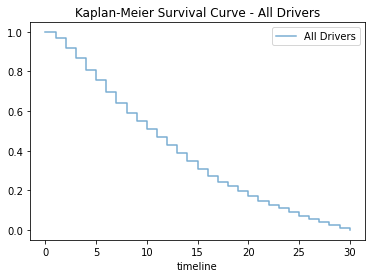

In [167]:
kmf = KaplanMeierFitter()

# Overall survival curve
kmf.fit(durations= uber_data['days_before_first_completion'], event_observed = uber_data['completion_status'], label="All Drivers")
kmf.plot_survival_function(ci_show=False, alpha=0.6)
plt.title("Kaplan-Meier Survival Curve - All Drivers")
plt.show()


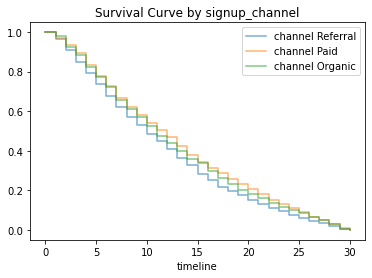

In [168]:
# By signup_channel
plt.figure()
for group in uber_data['signup_channel'].unique():
    mask = uber_data['signup_channel'] == group
    kmf.fit(durations= uber_data[mask]['days_before_first_completion'], 
            event_observed= uber_data[mask]['completion_status'], label=f"channel {group}")
    kmf.plot_survival_function(ci_show=False, alpha=0.6)

plt.title("Survival Curve by signup_channel")
plt.show()

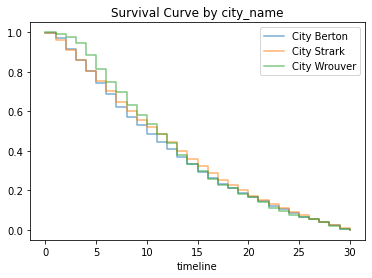

In [169]:
# By city_name
plt.figure()
for city in uber_data['city_name'].unique():
    mask = uber_data['city_name'] == city
    kmf.fit(durations= uber_data[mask]['days_before_first_completion'], 
            event_observed= uber_data[mask]['completion_status'], label=f"City {city}")
    kmf.plot_survival_function(ci_show=False, alpha=0.6)

plt.title("Survival Curve by city_name")
plt.show()

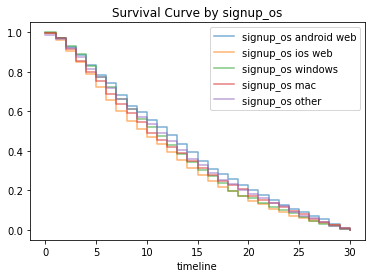

In [170]:
# By signup_os
plt.figure()
for os in uber_data['signup_os'].unique():
    mask = uber_data['signup_os'] == os
    kmf.fit(durations= uber_data[mask]['days_before_first_completion'], 
            event_observed= uber_data[mask]['completion_status'], label=f"signup_os {os}")
    kmf.plot_survival_function(ci_show=False, alpha=0.6)

plt.title("Survival Curve by signup_os")
plt.show()

In [171]:
uber_data.head()

,city_name,signup_os,signup_channel,days_before_first_completion,completion_status,bgc_status,vehicle_added_status
3,Berton,android web,Referral,5.0,1,1,1
6,Strark,ios web,Paid,9.0,1,1,1
12,Strark,android web,Referral,16.0,1,1,1
15,Strark,windows,Referral,1.0,1,1,1
43,Berton,android web,Referral,6.0,1,1,1


## Step 4: Cox Proportional Hazards Model

In [172]:
# One-hot encode the 'group' column
df_encoded = pd.get_dummies(uber_data, columns=['city_name','signup_os','signup_channel'], drop_first=True, dtype= int) 

In [173]:
df_encoded.head()

,days_before_first_completion,completion_status,bgc_status,vehicle_added_status,city_name_Strark,city_name_Wrouver,signup_os_ios web,signup_os_mac,signup_os_other,signup_os_windows,signup_channel_Paid,signup_channel_Referral
3,5.0,1,1,1,0,0,0,0,0,0,0,1
6,9.0,1,1,1,1,0,1,0,0,0,1,0
12,16.0,1,1,1,1,0,0,0,0,0,0,1
15,1.0,1,1,1,1,0,0,0,0,1,0,1
43,6.0,1,1,1,0,0,0,0,0,0,0,1


In [174]:

df_encoded = df_encoded.drop(['bgc_status'], axis = 1)

In [175]:
df_encoded.head()

,days_before_first_completion,completion_status,vehicle_added_status,city_name_Strark,city_name_Wrouver,signup_os_ios web,signup_os_mac,signup_os_other,signup_os_windows,signup_channel_Paid,signup_channel_Referral
3,5.0,1,1,0,0,0,0,0,0,0,1
6,9.0,1,1,1,0,1,0,0,0,1,0
12,16.0,1,1,1,0,0,0,0,0,0,1
15,1.0,1,1,1,0,0,0,0,1,0,1
43,6.0,1,1,0,0,0,0,0,0,0,1


In [176]:
for col in df_encoded.columns:
    print(f"\nColumn: {col}")
    print(df_encoded[col].unique())



Column: days_before_first_completion
[ 5.  9. 16.  1.  6. 12.  8.  3. 15. 29. 24. 22. 17. 21.  2.  7.  0. 11.
 13. 19. 26. 28. 10. 30. 18. 23. 27. 14.  4. 25. 20.]

Column: completion_status
[1]

Column: vehicle_added_status
[1 0]

Column: city_name_Strark
[0 1]

Column: city_name_Wrouver
[0 1]

Column: signup_os_ios web
[0 1]

Column: signup_os_mac
[0 1]

Column: signup_os_other
[0 1]

Column: signup_os_windows
[0 1]

Column: signup_channel_Paid
[0 1]

Column: signup_channel_Referral
[1 0]


In [177]:
cph = CoxPHFitter()
cph.fit(df_encoded, duration_col='days_before_first_completion', event_col='completion_status',
         show_progress=True)
cph.print_summary()


Iteration 1: norm_delta = 1.26e-01, step_size = 0.9500, log_lik = -46106.67171, newton_decrement = 3.33e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.02e-02, step_size = 0.9500, log_lik = -46073.05327, newton_decrement = 2.09e-01, seconds_since_start = 0.0
Iteration 3: norm_delta = 5.74e-04, step_size = 0.9500, log_lik = -46072.84434, newton_decrement = 6.89e-04, seconds_since_start = 0.0
Iteration 4: norm_delta = 3.26e-07, step_size = 1.0000, log_lik = -46072.84365, newton_decrement = 3.08e-10, seconds_since_start = 0.0
Convergence success after 4 iterations.


<lifelines.CoxPHFitter: fitted with 5989 total observations, 0 right-censored observations>
             duration col = 'days_before_first_completion'
                event col = 'completion_status'
      baseline estimation = breslow
   number of observations = 5989
number of events observed = 5989
   partial log-likelihood = -46072.84
         time fit was run = 2025-07-07 15:25:22 UTC

---
                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                
vehicle_added_status     0.22      1.24      0.07            0.08            0.35                1.09                1.42
city_name_Strark        -0.03      0.97      0.03           -0.08            0.03                0.92                1.03
city_name_Wrouver       -0.02      0.98      0.05           -0.12            0.08                0.89                1.09
signup_os_ios web        0.17      1.19      0.03            0.10            0.24                1.11                1.27
signup_os_mac            0.11      1.11      0.04            0.02            0.19                1.02                1.21
signup_os_other          0.10      1.10      0.05           -0.01            0.20                0.99                1.22
signup_os_windows        0.14      1.16      0.04            0.06            0.23                1.06                1.26
signup_channel_Paid     -0.05      0.95      0.04           -0.13            0.03                0.88                1.03
signup_channel_Referral  0.10      1.11      0.03            0.04            0.17                1.04                1.19

                         cmp to     z      p  -log2(p)
covariate                                             
vehicle_added_status       0.00  3.20 <0.005      9.53
city_name_Strark           0.00 -0.98   0.33      1.62
city_name_Wrouver          0.00 -0.31   0.76      0.40
signup_os_ios web          0.00  5.02 <0.005     20.87
signup_os_mac              0.00  2.50   0.01      6.32
signup_os_other            0.00  1.84   0.07      3.92
signup_os_windows          0.00  3.37 <0.005     10.36
signup_channel_Paid        0.00 -1.26   0.21      2.26
signup_channel_Referral    0.00  2.97 <0.005      8.37
---
Concordance = 0.54
Partial AIC = 92163.69
log-likelihood ratio test = 67.66 on 9 df
-log2(p) of ll-ratio test = 34.41

Interpretation: 
- Based on the model output,  `vehicle added`, `signup channel being referral`,`signup_os_ios web`,`signup_os_mac`, `signup_os_windows` are the significant factors to whether a driver will start driving or not. 
- Adding vehicle will increase the likelihood of driving by a factor of 1.24, holding the values of the other predictors constant. 
- If a driver's signup channel is referral, that will also increase the likelihood of driving by a factor of 1.1. 
- If the signup os is ios web, that will increase the likelihood of driving by a factor of 1.19.
- If the signup os is mac, that will increase the likelihood of driving by a factor of 1.11.
- If the signup os is windows, that will increase the likelihood of driving by a factor of 1.16.

##  Optional: Log-Rank Test (compare survival curves)

In [178]:
from lifelines.statistics import logrank_test

groupRef = uber_data[uber_data['signup_channel'] == 'Referral']
groupPaid = uber_data[uber_data['signup_channel'] == 'Paid']

results = logrank_test(groupRef['days_before_first_completion'],
                    groupPaid['days_before_first_completion'],
                       event_observed_A=groupRef['completion_status'],
                       event_observed_B=groupPaid['completion_status'])

results.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          25.30 <0.005     20.96

Interpretation: 
- The null hypothesis for this test is that the survival distributions being compared are equal at all times. Since the p-value is <0.005, we have enough evidence to conclude that the survival distributions between `signup channel - referral` and `signup channel - paid` differ.

## Summary


- Kaplan-Meier: Describes survival probability over time, non-parametrically.
- Cox model: Explains how covariates influence survival.
- Log-rank test: Tests if survival distributions differ significantly between groups.